In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from joblib import dump, load
from sklearn.metrics import accuracy_score, precision_score

In [2]:
mush_data = pd.read_csv('mushrooms.csv')
mush_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mush_data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [4]:
n_data = mush_data.dropna()

In [5]:
n_data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


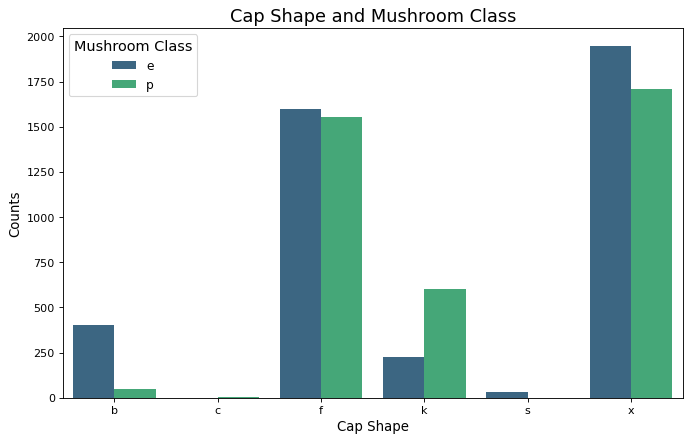

In [6]:
grouped_data = mush_data.groupby(['cap-shape', 'class']).size().reset_index(name='Counts')
 
# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
sns.barplot(x='cap-shape', y='Counts', hue='class', data=grouped_data, palette='viridis')
ax.set_title('Cap Shape and Mushroom Class', fontsize=16)
ax.set_ylabel('Counts', fontsize=12)
ax.set_xlabel('Cap Shape', fontsize=12)
ax.legend(title='Mushroom Class', title_fontsize='13', fontsize='11')

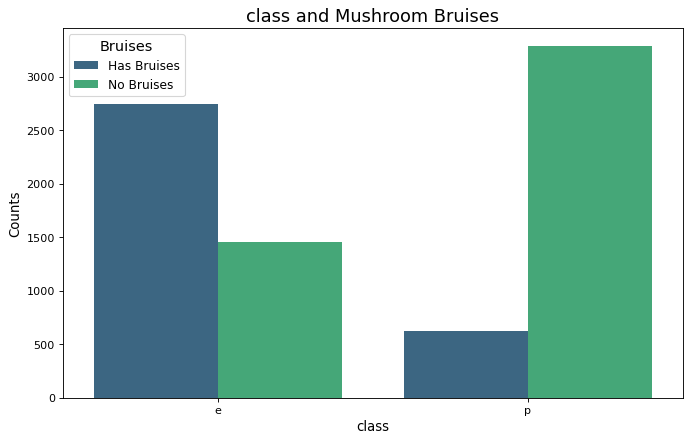

In [7]:
mush_data['bruises'] = mush_data['bruises'].replace({'t': 'Has Bruises', 'f': 'No Bruises'})

grouped_data = mush_data.groupby(['class', 'bruises']).size().reset_index(name='Counts')

fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
sns.barplot(x='class', y='Counts', hue='bruises', data=grouped_data, palette='viridis')
ax.set_title('class and Mushroom Bruises', fontsize=16)
ax.set_ylabel('Counts', fontsize=12)
ax.set_xlabel('class', fontsize=12)
ax.legend(title='Bruises', title_fontsize='13', fontsize='11')
plt.show()

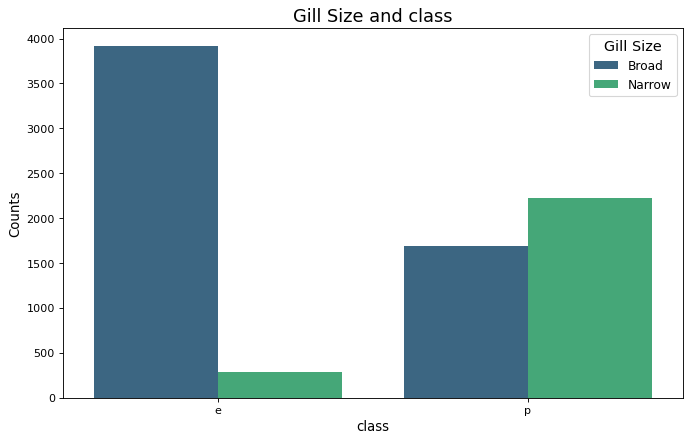

In [8]:
mush_data['gill-size'] = mush_data['gill-size'].replace({'b': 'Broad', 'n': 'Narrow'})

grouped_data = mush_data.groupby(['class', 'gill-size']).size().reset_index(name='Counts')

fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
sns.barplot(x='class', y='Counts', hue='gill-size', data=grouped_data, palette='viridis')
ax.set_title('Gill Size and class', fontsize=16)
ax.set_ylabel('Counts', fontsize=12)
ax.set_xlabel('class', fontsize=12)
ax.legend(title='Gill Size', title_fontsize='13', fontsize='11')
plt.show()

In [9]:
x = mush_data.drop(columns=['class'])
y = mush_data['class']

In [10]:
categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
                       'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
                       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
                       'spore-print-color', 'population', 'habitat']
encoder = BinaryEncoder()
# Ensure the original categorical columns are used from mush_data
x_encoded = encoder.fit_transform(mush_data[categorical_features])
x = x.drop(columns=x.columns.intersection(categorical_features), axis=1)
x = x.reset_index(drop=True)
x_encoded = x_encoded.reset_index(drop=True)
x = pd.concat([x, x_encoded], axis=1)

In [11]:


# Apply SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)

In [12]:
y.value_counts()

class
p    4208
e    4208
Name: count, dtype: int64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .25, random_state=42)

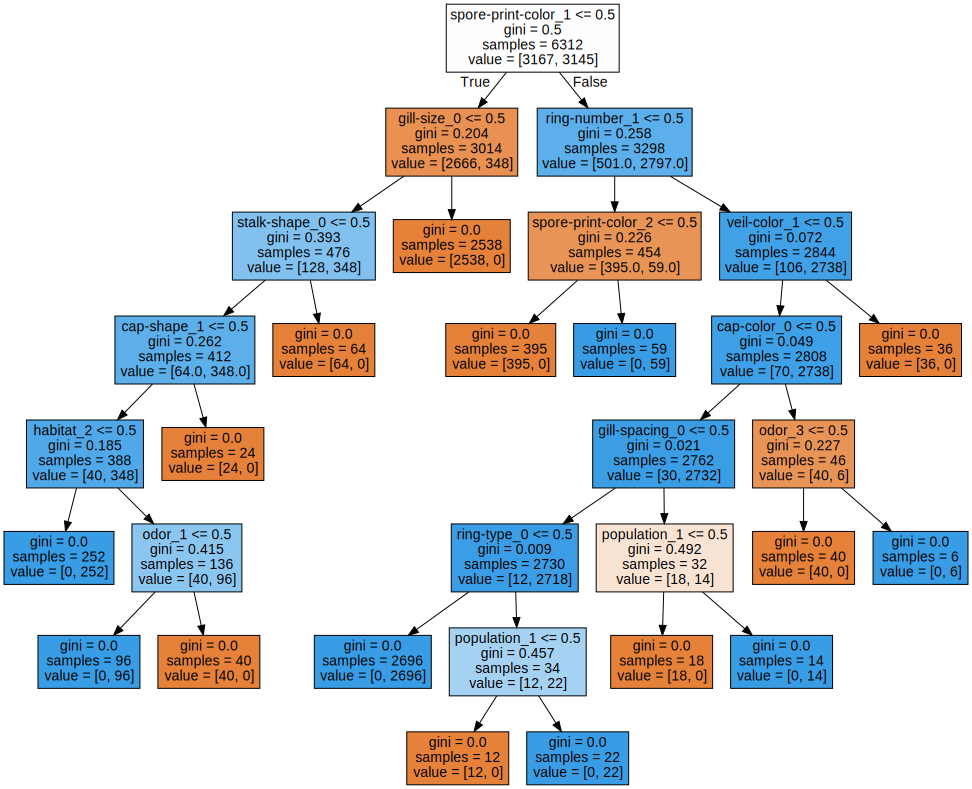

In [14]:
dcs = DecisionTreeClassifier()
dcs.fit(x_train, y_train)
export_graphviz(dcs, out_file='tree.dot', filled=True, feature_names=x_train.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph) 

# save model
# dump(dcs, "decision_tree_model.joblib")

In [15]:
dcs_prediction = dcs.predict(x_test)
dcs_accuracy = accuracy_score(dcs_prediction, y_test)
dcs_precision = precision_score(dcs_prediction, y_test, average='micro') 

print(f"Accuracy: {dcs_accuracy*100:.2f}%")
print(f"Precision: {dcs_precision*100:.2f}%")

Accuracy: 100.00%
Precision: 100.00%


In [16]:
loaded_model = load("decision_tree_model.joblib")
loaded_prediction = loaded_model.predict(x_test)